In [33]:
#Step 1: Use pandas to load the IMDB Movie Dataset.
#Inspect the data to understand its structure and content

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('imdb_top_1000.csv')
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
#Step 2 Data Preprocessing
#Checking For Null values, there were null values but replaced it with ' ' so now there is none
df.isnull().sum()
df = df.fillna(' ')
df = df.drop(columns=['Poster_Link','Overview'])

In [6]:
df[df.isnull().any(axis=1)]['Series_Title'].to_list()

[]

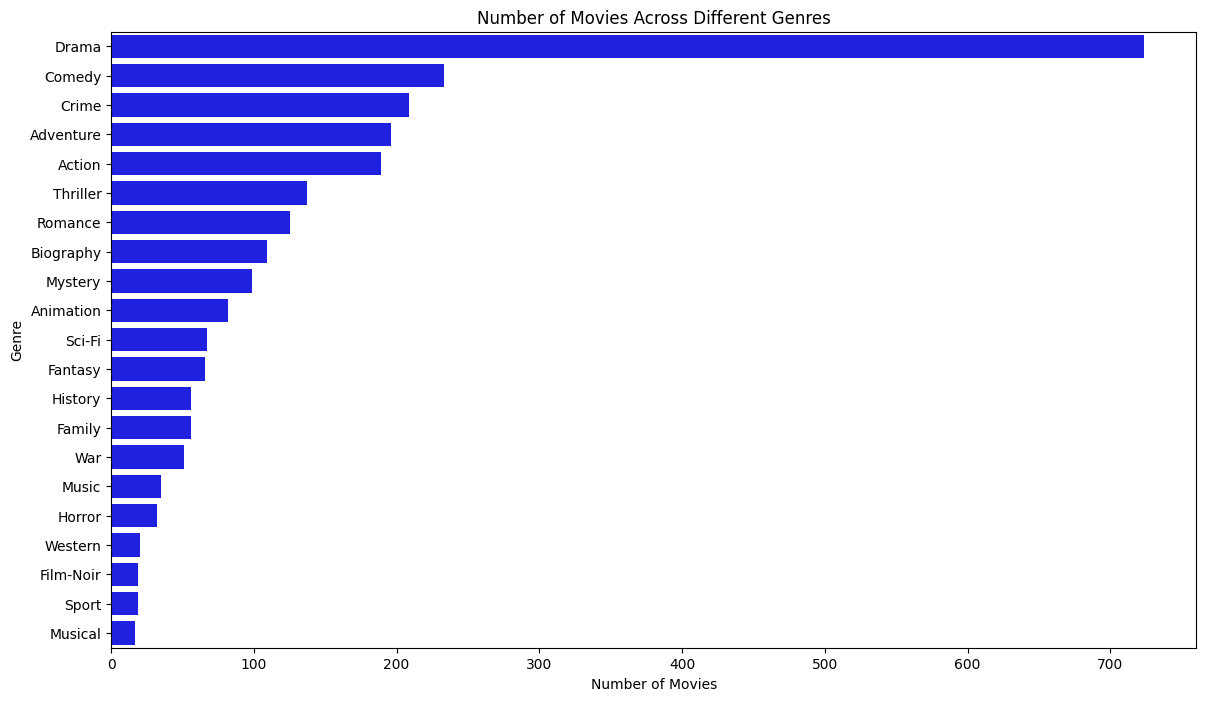

In [38]:
genres = df['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_counts = genres.value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, color='blue')
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

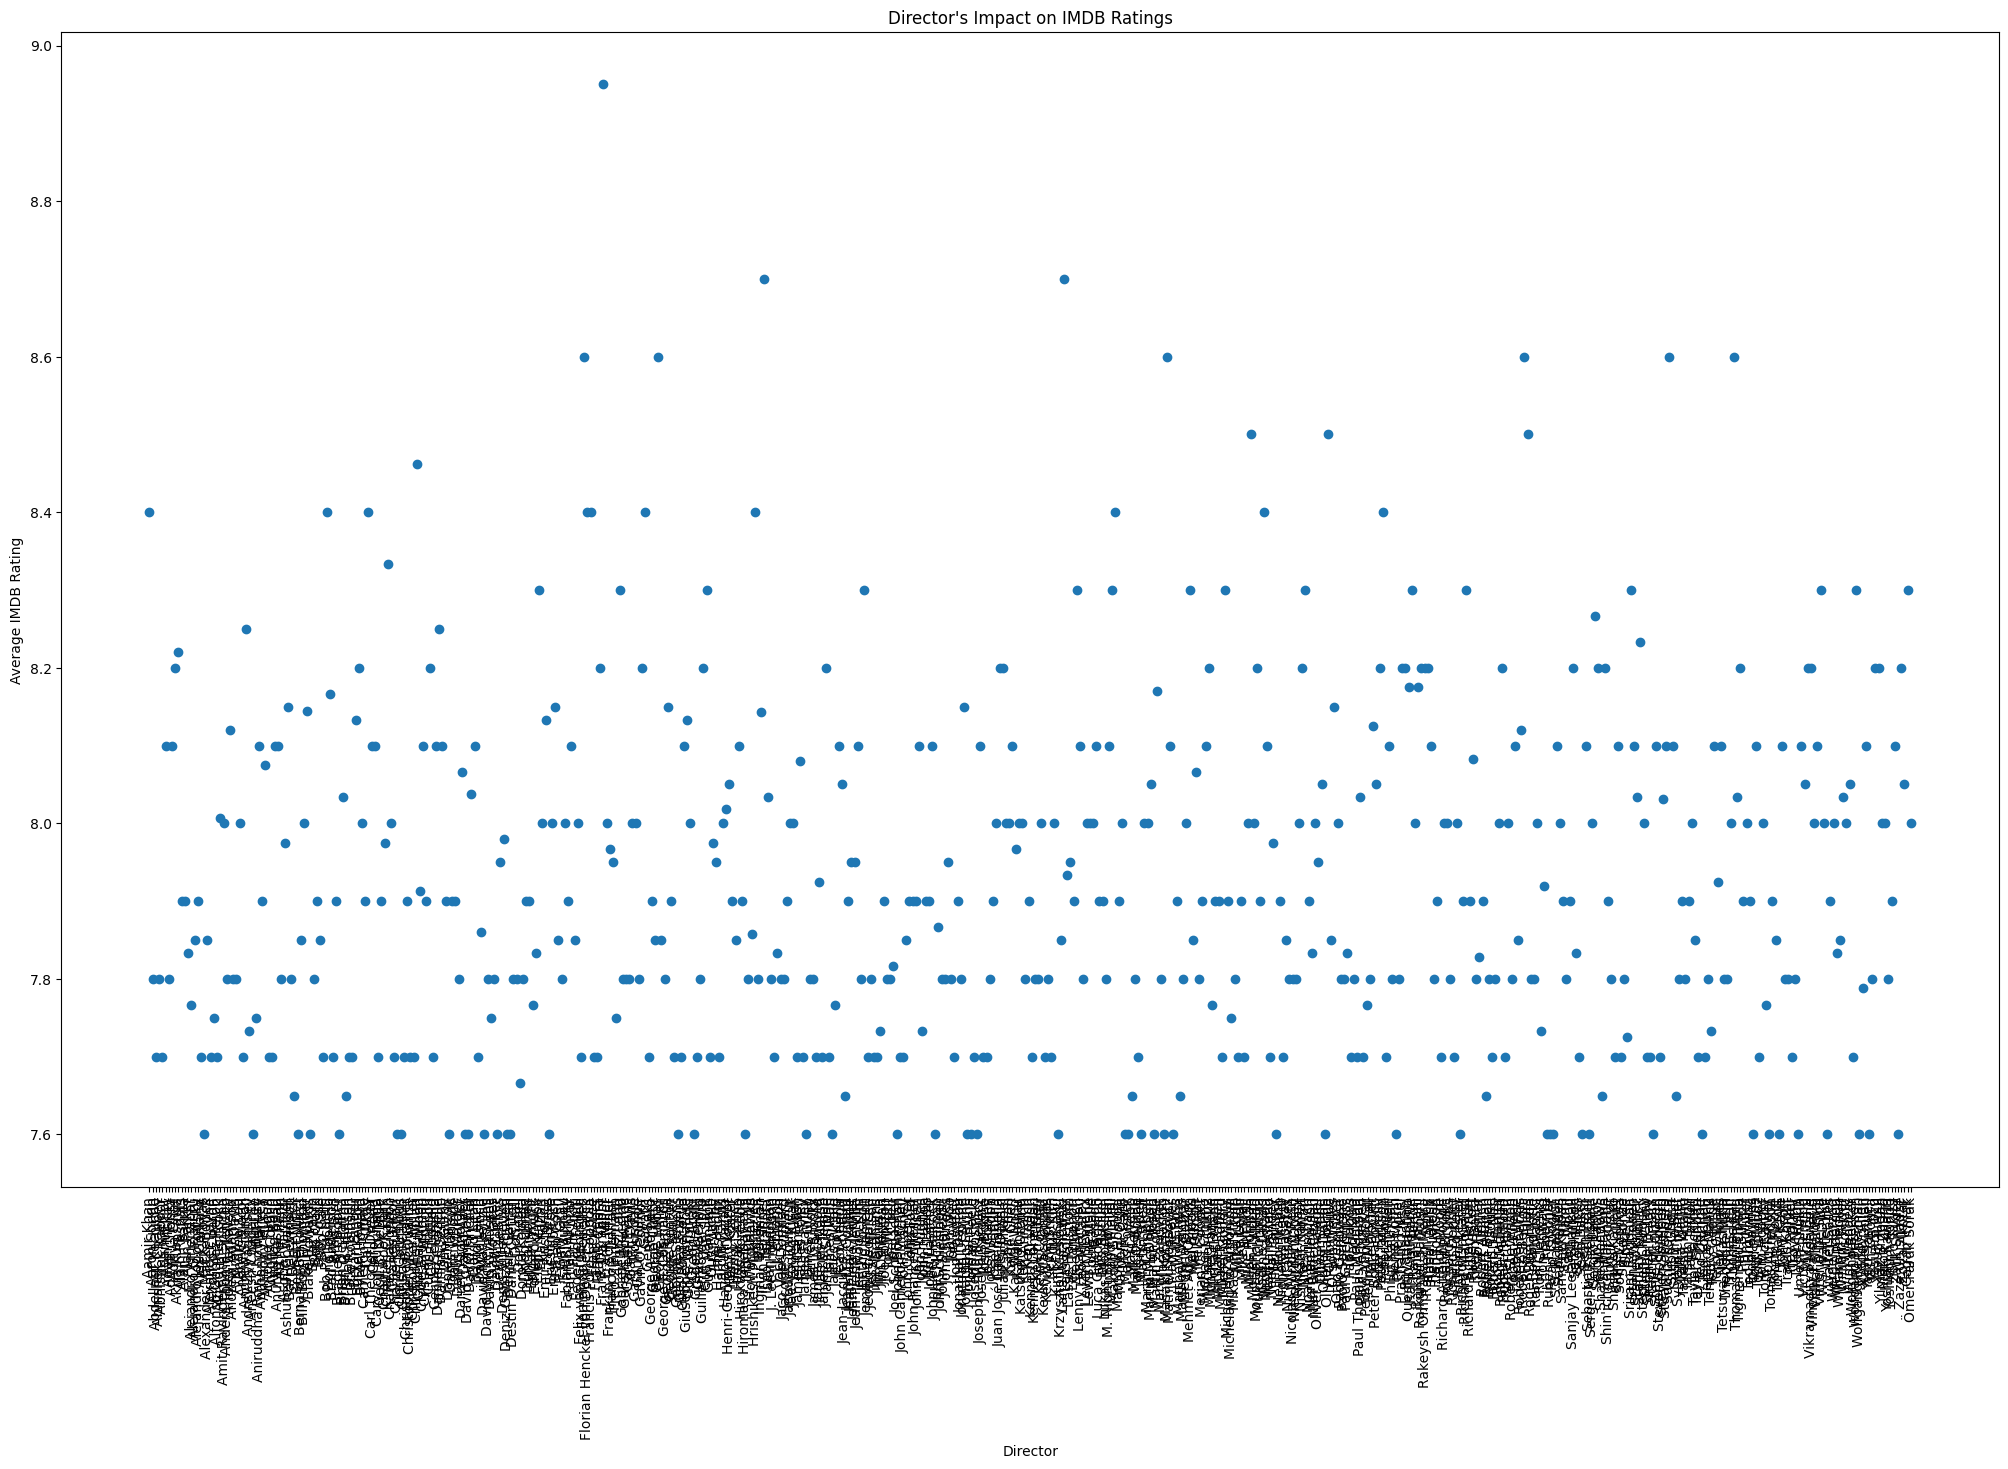

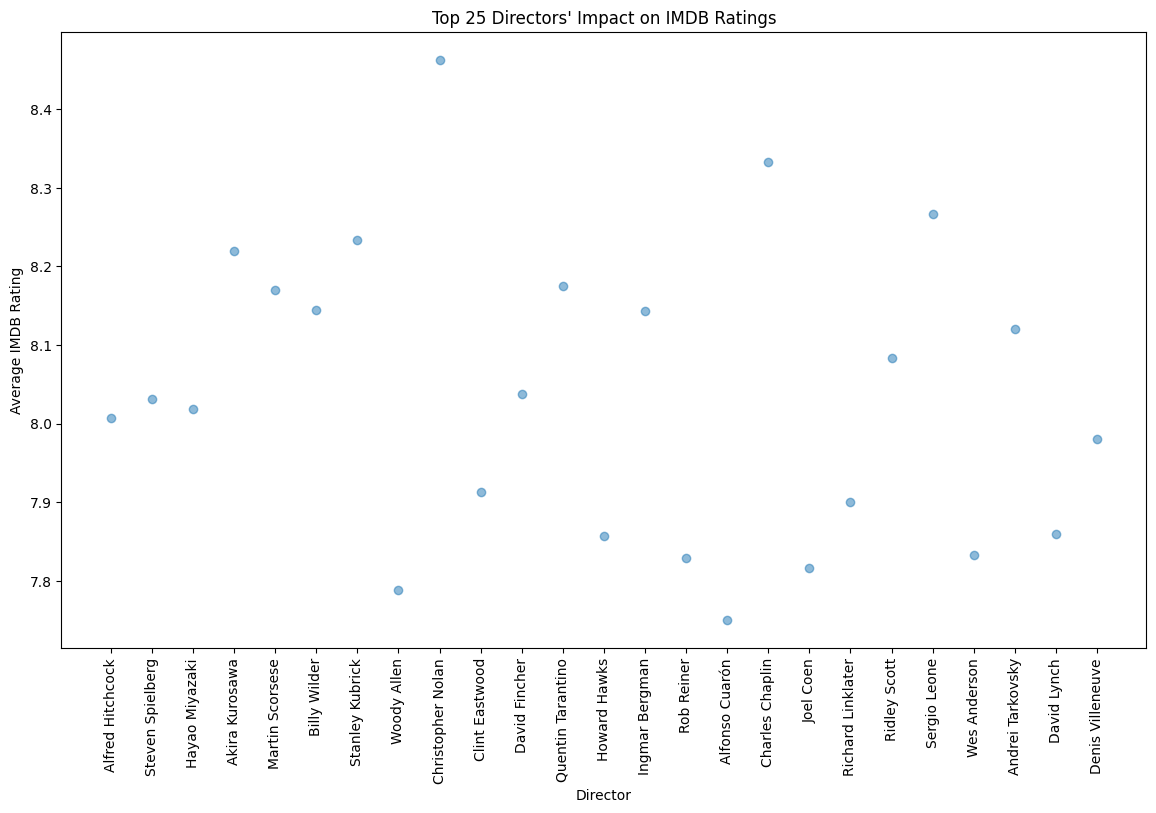

In [20]:
#Step Five: Director’s Impact on Ratings:
import matplotlib.pyplot as plt

director_ratings = df.groupby('Director')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(25, 15))
plt.scatter(director_ratings['Director'], director_ratings['IMDB_Rating'])
plt.title('Director\'s Impact on IMDB Ratings')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.show()

# Calculate the number of movies each director directed
director_counts = df['Director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Movie_Count']
# Merge the average ratings with the counts
director_stats = pd.merge(director_ratings, director_counts, on='Director')
# Select top 20 directors based on the number of movies they directed
top_directors = director_stats.nlargest(25, 'Movie_Count')

plt.figure(figsize=(14, 8))
plt.scatter(top_directors['Director'], top_directors['IMDB_Rating'], alpha=0.5)
plt.title('Top 25 Directors\' Impact on IMDB Ratings')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.show()

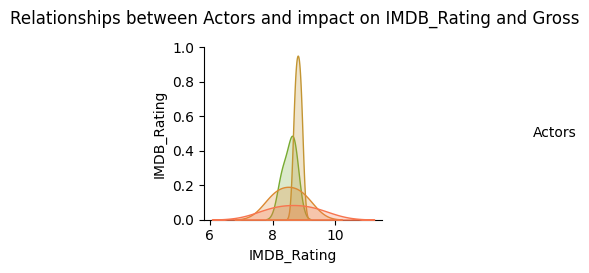

In [21]:
##6 Star Power Analysis: Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
stars_rating = cdata.groupby('Star1')['IMDB_Rating'].mean().reset_index()
# filtering stars with lower rating than 8.4
top_stars_list = stars_rating[stars_rating['IMDB_Rating'] > 8.4]
# Using the info from df with only stars which average rating is over 8.4
top_stars_df = cdata[cdata['Star1'].isin(top_stars_list['Star1'])]

columns = ['IMDB_Rating','Gross','Star1']

subset = top_stars_df[columns]
subset = subset.rename(columns={'Star1': 'Actors'})

sns.pairplot(data=subset, hue= 'Actors')
plt.suptitle('Relationships between Actors and impact on IMDB_Rating and Gross', y=1.05)
plt.subplots_adjust(top=0.9)
plt.show()

In [22]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   object 
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ KB


In [37]:
numeric_columns= ['IMDB_Rating','Meta_score','No_of_Votes','Gross']
corr_data = cdata[numeric_columns]

corr_matrix = cdata[numeric_columns].corr()

sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')

AttributeError: Can only use .str accessor with string values!

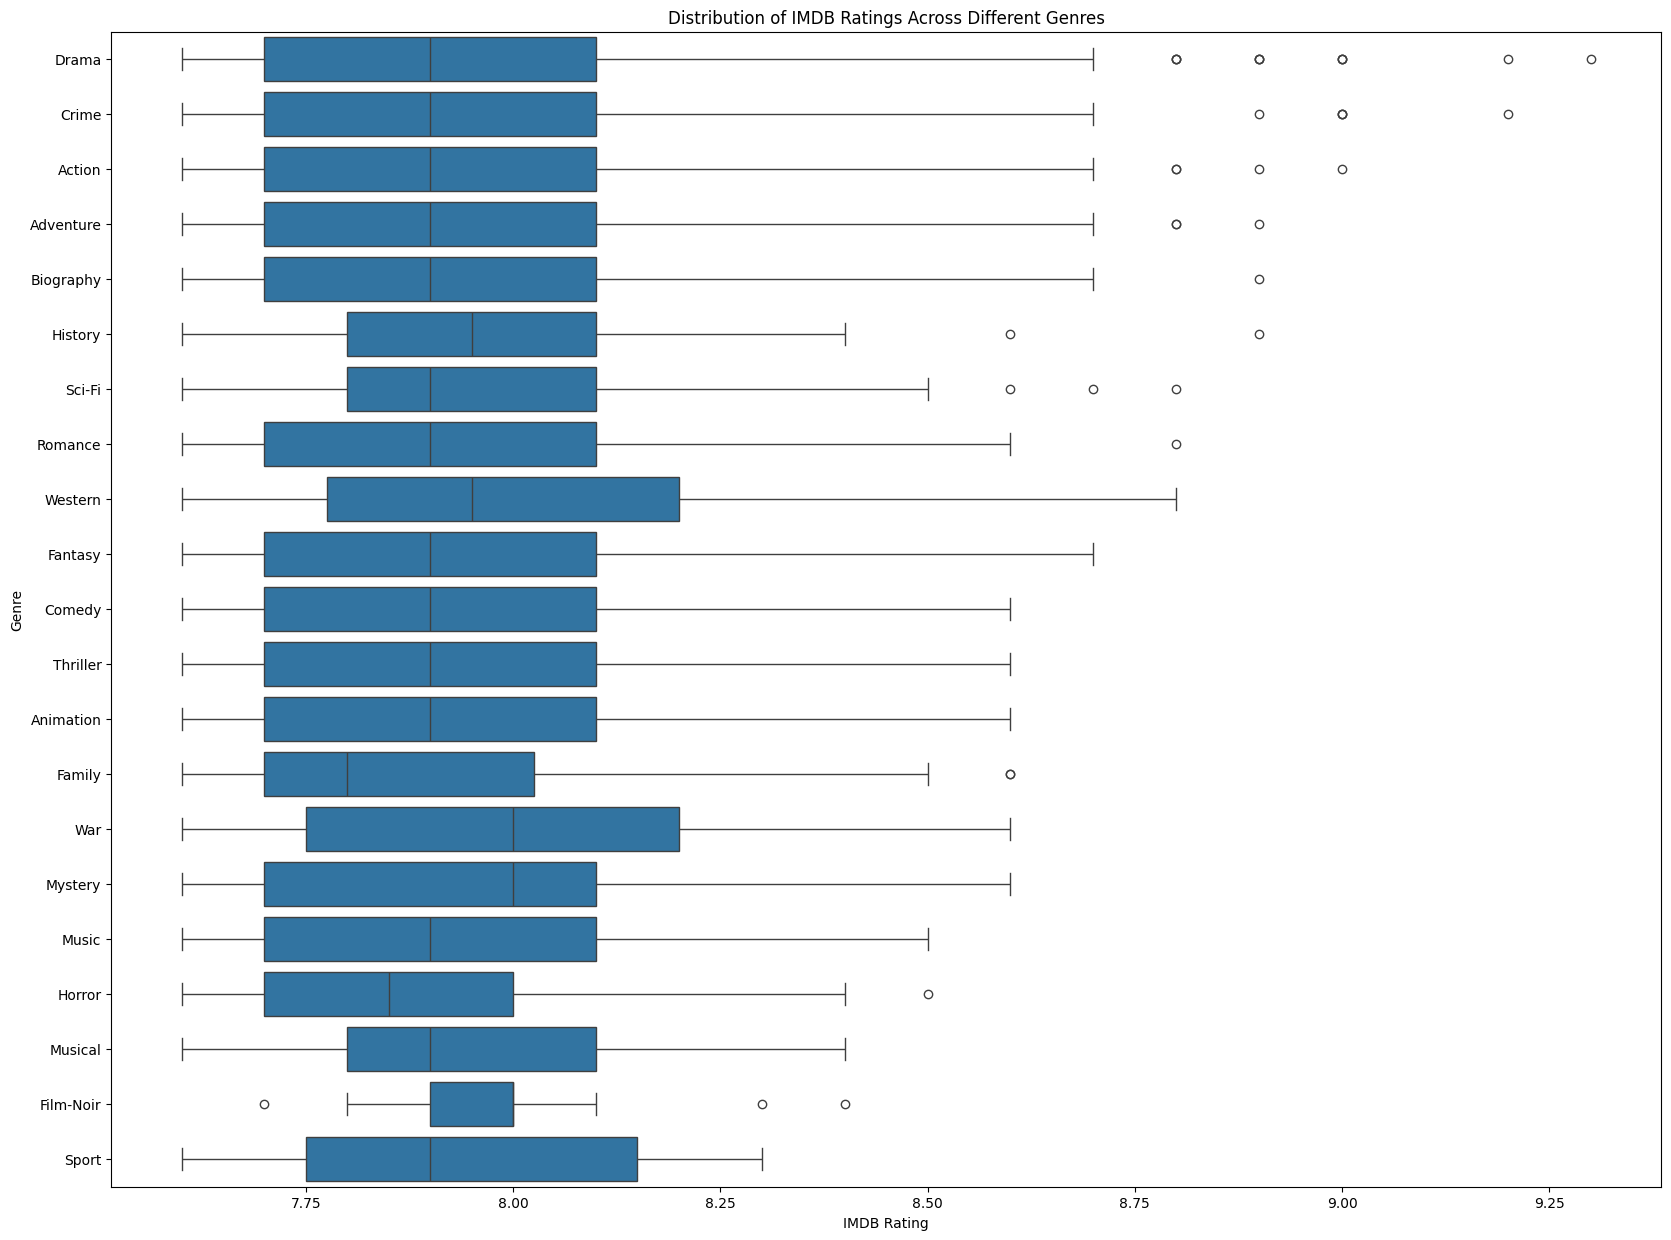

AttributeError: Can only use .str accessor with string values!